In [1]:
include("../scripts/robot.jl")

In [2]:
mutable struct Particle
    pose
end

In [3]:
mutable struct Mcl
    particles
end

In [4]:
function Mcl_(init_pose, num)
    self = Mcl(ntuple(x->nothing, fieldcount(Mcl))...)
    self.particles =[Particle(init_pose) for i in 1:num]
    return self
end

Mcl_ (generic function with 1 method)

In [5]:
function draw(self::Mcl, ax, elems)
    xs = [p.pose[1] for p in self.particles]
    ys = [p.pose[2] for p in self.particles]
    vxs = [cos(p.pose[3]) for p in self.particles]
    vys = [sin(p.pose[3]) for p in self.particles]
    elems = vcat(elems, ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))
end

draw (generic function with 6 methods)

In [6]:
mutable struct EstimationAgent <: AbstractAgent
    nu
    omega
    estimator
end

In [7]:
function  EstimationAgent_(nu, omega,estimator)
    self = EstimationAgent(ntuple(x->nothing, fieldcount(EstimationAgent))...)
    self.nu = nu
    self.omega = omega
    self.estimator = estimator
    return self
end

EstimationAgent_ (generic function with 1 method)

In [8]:
function draw(self::EstimationAgent, ax, elems)
    draw(self.estimator, ax, elems)
end

draw (generic function with 7 methods)

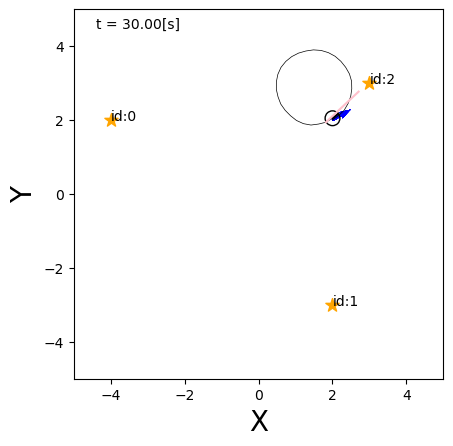

In [9]:
world = World(30, 1.0)

m = Map()
for in in [[-4.0,2.0], [2.0, -3.0], [3.0, 3.0]]
    append_landmark(m, Landmark(in))
end
append(world, m)

initial_pose = [2.0, 2.0, pi/6]
estimator = Mcl_(initial_pose, 100)
circling = EstimationAgent_(0.2, 10.0/180*pi, estimator)
r = Robot_(initial_pose, sensor=Camera_(m), agent=circling)
append(world, r)

draw(world)

In [10]:
showanim("test.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAVydtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTggLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAE85liIQAF//+99S3zLLtU2+2C6j3op4mX0N1JQGblsTtOoAAAAMAAAMAAB68FzgCX4kK868AAAMAyoAXqEn/CmOPiA7BC5NJlvfhKIWPSXi/zA6JYDLoQAMQkginty7NGv2twoUk3+x++sOjYLO23GkLnX3zZEYn6a9vQcRQLf67K7SBvVrJ/o4DfjcfmL80ItpTpOBk9UoqIRYyXX9Jp26SG/qkhzXvDYJnUDUkXMWTV9xgIkId/B0DL63tzWtJoDT3qBLshsubVeON8CDX6ibsLgVVQ4A0D7tGbVkDzT/KsUAH7fA8ber7HvEJfThyzrLkSWNw9QjQzXk0jYHioNxDFOC0u5P/6flbarG27qxKpcR1g3jAe/uyNQkdibir9L1oZNoxCL9nTz5Do7WCxbZi9Ea0fjbwfl2o9ts0w9wdN5MJVeAjp2apf/nrOG4XqhXEOky0ViewaAExu4pV61UcgekdA1z3mTGfHUVi7lbjNjafsSusndiXhSJn8k8VhLU7uYRjxIdQ0M5ROE4eOe0Eev0A9OOL8/r81/6uO/7gObO3O8ikho5Gmu+TSMNye6np8b69hULJzIwzgFY4798RLsws18k5UOAeCwOlWwPO/Yh7LwJnPykhJTN9kY+OpWNFg6l3by+FnBglFK53i/Q76FzranJpKNyMajWn2P0NKgYsg0pdHCtadp/QrLQFGG/Uvsnr/YYD4WRXbXE39PfEt3WXzcLIFejx4Gt+Y5vXjx9188tPzEUQ37Zw/zgwWPNpTzLqavgaCxbScarwxPCvTEfjY2IgWiCV2TAmynCCVycdvV7xluoiPfvQtuifGsCs5YeZ9J8GpdY91b9ZGS2bIeFDnNqmEVKNhTQ1ZbpLevGpqcaYqUq2aJZqun5+76fMIuZBWOyg57h83Eu+5uwLKCuIj79ymNk1XCHAzGKD3YWFWfGN5XRBrCF3tVPXNXbx9HPf8P6AARgAQw+GmrlGkoO/Wptk4p484999hGQJnjkVRaNWpmx91yfhkAMJnm/ijKcebk3F1H2kpsn0kCw48F2x3aP+7vWcmr8RBgdKtu93Pg8f6YlhIRg4yqJ7hRTVJwn/wNHo0P2OYh45MujiyHokxlMOyCYyOJmrGi1Pbr+HEd8S6kRivgnBThXHOb6n89X5zcam54bgihQIAhL6ShJKYQ3N/aMai3EmHqi+C/D3mlOzFNGHU601JEL4mr91q5Lk2iE3esdiLVAomnC3g3qrU0VNELZ9kI90G1HK4menGkQGnXnFBQjItY22BAbKSNND8Sv+jt8MpGHRWhTT8v9IxaCLBgcQJrLwJqffhcOejvrTwjlRvkSHJn/XUOw9vfgztRSBG/pY3Eta1LfrYGAa+JFjvxToA3VClWFJA8wgdKo74OCrjIIpBrNIs8fn1gwI2mdzsTvARV1ckVfm3aUOizCwALIsnuT0v+GeQEZPvOfngejHJzSlXe25RfmY5s04ALJcEbk4/U8G/HEenk111tJMVma1OFQaN3CLbcrLwUYKell9m2kHQ1PGk9N8fIjr5KlZsts9ZGgz7pD1EPJdt5kPPNySzOLwoodrIxFjuDR4cC5vt/xoXN9Bf8n/6p8bD/Ja5fpW7vMDvRuukUkXLeTY0JueT0XpDTnfs/EhyLZbLaHkfFc0xVCYR2E2Bx3Nk5C90GCao5kHOagkOqkFP5Qk2KoZKbr4inF9T1LF5knS7badfFpbPiDh58qtPBDJVvuHK1L3gQKMtlX63fbExd151sZpyTSVHsJFOHBHsETlGIpKwaY0uPPRhFgPbOqkjhClZkDdoE5w02/WGm/4JwHMR5BQPh5f5Tc4tjOuT15WUAKVCYTudi2amK9saIGQHMLBLLiIPlYGUwGNggoSrX9EfV0gmVlVBQlpKG+yyXCaWh5V/aDbFkfMRlgUs4ICjf/kVsdfedtoZg4bRoCiTpxrID+K5WwahFQdBLOzm2nUAqS21lTC85aGZhMjVsNMqejrXskYoyhuB+8exaJdp+qZm8wSV7Hcf1+SKGQPMtPL89hCYRjgYljMTEb3nbNN/cM1hX+zsEQFA1EtKO4vhQ5sUeDQlgyBM7SmBTONmqlBM57UCjgXkZS+elHCGdgpU1iKIgUuCfWM4yj5iQ+TQFSREibzBF//weUISOzckKPSDsvOuS7VvO093r1vRRZt/SnMrbnNksCYQ4VHuUQx35BsH2LJ1zL9QN24cJjxvcs0PzVMMZ/OebDtVMD6sBX6tUJ6NxHZtf9BDhDl+Gjkca/+UUql0Xr/cqx+KRDhTB8Sgt/P27uMYIeDJa0OwhI8tK4KoToxLMeB8HrmV57ljGp+fQOpdnERetZdWmcV33Oif+WB4jqiAJEYzebYqAsazE5Xcepk8OsNsLSUoQ7cUzFQUzwjZlB429aE1+prrrUrv2aOHkEH3QCPESknzdgMMYeHCyoPBBaYceUVBGu1jwQe2unjRaXZkHHFpZiYguFOO15Cq6wz6/biIF+KDHVPraf8ks9C8RrHPV0gt7ky2W0bH1qYTEM1sgB67eEdEAvJ8xlCn2Ht7M3zlvHDYZeaSPdbR3D/gr8/Kfur1exVl3LGFZqPsmzSs/KoZZBF0cvMJ0Q6APGTjBry6pgiTRPi5PDnD0Da3coMwy92vFnfzVLScc4ybiWj8LVJaoq0KHEU1NVqr3pmGcv3FS7WSHQ4bjCCOnMj+lCXP09pFroIJcDywzqvKQpbd1roOJ5G6jiqyTO135Xwb5C1JRD5fXli7LXzE6lcFLX7zmw+gazgGjbNYvk0oJurPQYu1C3PxFzOVnDRo5mb4VkLi3VJqe3wer4ISqzSCzEEkziShPbWoiYJ5+UOlJ3IgtoYMGwSaCyJTPMs2UuCO4kTGsZLkhNZXEjbr8OzrMqR5A5yYLN8Kq8zlEv+XP44s92XCw4wP9blaZTE09VfXjtICQfHgwExMI/o+UYivNsCP9xcJfnvKcz7xkxdgFbYLzr